In [24]:
import numpy as np
from continuous_utils import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import pickle
def save_agents(agents, filename):
    filename = 'saved_sim_runs/' + filename + '.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(agents, file)

In [26]:
def sort_agents_by_opinion(agents):
    return sorted(agents.items(), key=lambda x: x[1].opinions[0])

In [27]:
opinions = pd.read_csv('opinions.csv', index_col=0)
opinions['0'].to_list()

[0.9254408349108836,
 0.8604742314598255,
 0.3180894090005649,
 0.4215689906650436,
 -0.7979143446515335,
 -0.4743228423909427,
 -0.5528900964494253,
 -0.6038805814296082,
 0.610025327412105,
 0.7003601296953018,
 0.3235245465800082,
 0.7948904054255999,
 -0.6744683772552201,
 0.6336968920357582,
 0.6366361721062032,
 0.6259451398632039,
 0.7885014760530985,
 -0.9123183545703382,
 0.3238955724644682,
 0.3345189000426768,
 -0.529616266049613,
 0.8355910342158088,
 -0.6963853318776642,
 -0.6801027672721638,
 0.9882413002854652,
 -0.3489149049826855,
 0.3241125969979126,
 0.5652146116208305,
 0.6464214864321598,
 0.8729703434394429,
 -1.0148208338467612,
 -0.7821595673635477,
 -0.4620431741702347,
 0.8259122585424972,
 -0.6729990369622505,
 0.4525057814462003,
 -0.5543552599017354,
 0.6958154796295676,
 1.1023479525674542,
 -0.5219700200958294,
 -0.2387447100450339,
 0.8054460159328752,
 0.6998975196231682,
 -0.6554156980339775,
 -0.9057088185679576,
 -0.4854076477987787,
 -0.672875809597

In [28]:

# opinions = symmetric_bimodal_opinions(
#     num_agents = 1000,
#     mean = 0.6,
#     std_dev = 0.25,
#     lower_bound = -10,
#     upper_bound = 10,
# )
# series = pd.Series(opinions)
# series.to_csv('opinions.csv')
saved_opinions = pd.read_csv('opinions.csv', index_col=0)
opinions = opinions['0'].to_list()

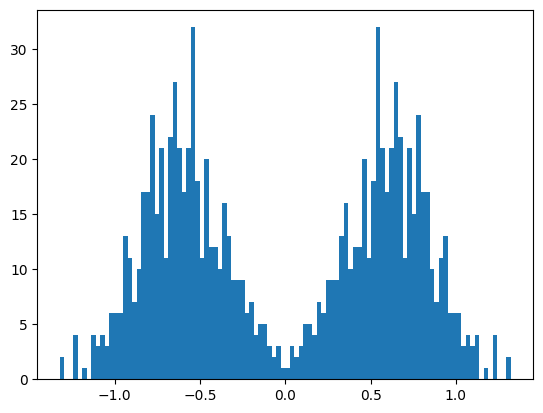

In [29]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [30]:
sim_agents_list = []
for i in range(21, 25, 2):
    print(f"starting sim with {100*i} iterations")
    num_iterations = 100*i
    new_agents = generate_agents(opinions)
    new_agents = sim(new_agents, num_iterations)
    sim_agents_list.append((num_iterations, new_agents))

starting sim with 2100 iterations
1000
iteration: 0. 100 iterations completed in: 0.28759026527404785 seconds
iteration: 100. 100 iterations completed in: 16.607060194015503 seconds
iteration: 200. 100 iterations completed in: 32.97405815124512 seconds
iteration: 300. 100 iterations completed in: 51.60895013809204 seconds
iteration: 400. 100 iterations completed in: 72.97984504699707 seconds
iteration: 500. 100 iterations completed in: 91.77466106414795 seconds
iteration: 600. 100 iterations completed in: 107.93957114219666 seconds
iteration: 700. 100 iterations completed in: 124.30371117591858 seconds
iteration: 800. 100 iterations completed in: 140.754878282547 seconds
iteration: 900. 100 iterations completed in: 157.5790729522705 seconds
iteration: 1000. 100 iterations completed in: 174.63510608673096 seconds
iteration: 1100. 100 iterations completed in: 190.80643701553345 seconds
iteration: 1200. 100 iterations completed in: 207.16584420204163 seconds
iteration: 1300. 100 iteration

In [31]:
for iterations, agents in sim_agents_list:
    save_agents(agents, f"symmetric_bimodal_{iterations}_iterations")

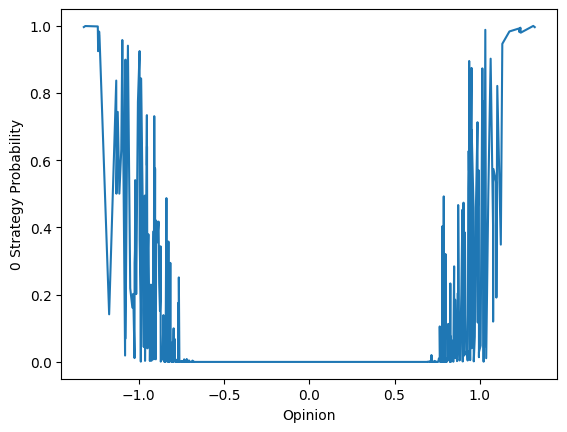

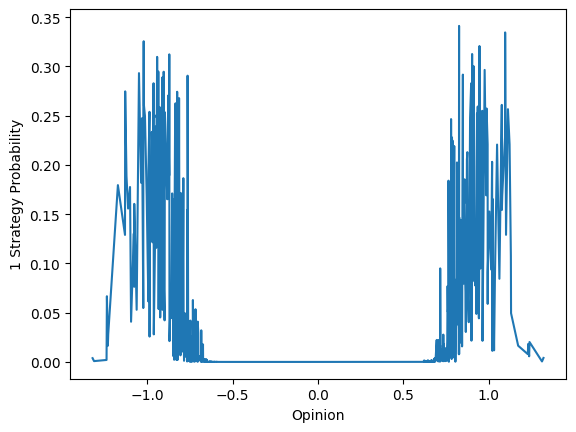

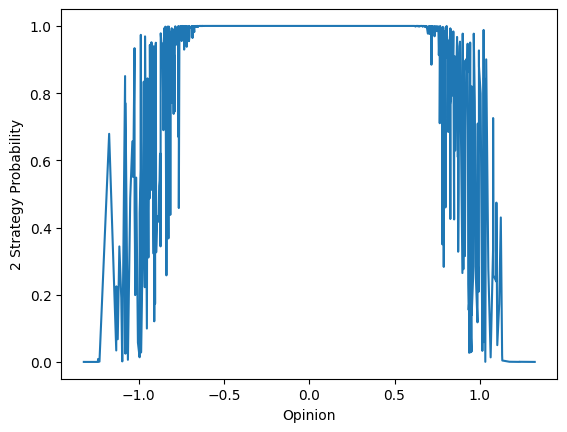

In [206]:
for strat in [0, 1, 2]:
    opinions = []
    low_strat_prob = []
    for uuid, agent in sorted_agents:
        opinions.append(agent.opinions[0])
        low_strat_prob.append(agent.agent_strat_prob_history[-1][strat])
    plt.plot(opinions, low_strat_prob)
    plt.xlabel('Opinion')
    plt.ylabel(f'{strat} Strategy Probability')
    plt.show()
    


In [11]:
def find_max_length_index_range(data, threshold, above_threshold=True):
    start_index = None
    max_range = (None, None)
    max_length = 0

    for i, value in enumerate(data):
        if (value > threshold if above_threshold else value < threshold):
            if start_index is None:
                start_index = i  # Start tracking a new range
        else:
            if start_index is not None:
                # Check the length of the current range
                current_length = i - start_index
                if current_length > max_length:
                    max_length = current_length
                    max_range = (start_index, i - 1)
                start_index = None  # Reset start index for the next potential range

    # Handle the case where the last values meet the condition and the range extends to the end of the data
    if start_index is not None:
        current_length = len(data) - start_index
        if current_length > max_length:
            max_range = (start_index, len(data) - 1)

    # If no valid range is found, return None
    if max_range[0] is None:
        return None

    return max_range

Sim with 100 iterations
-0.4263181912653936 0.4085616225739212


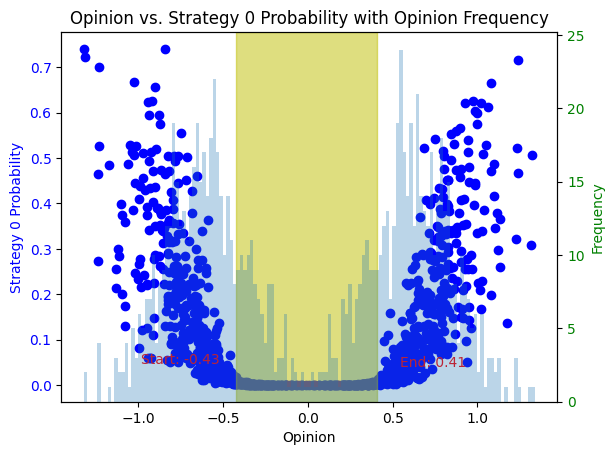

-0.2021182974008601 0.1295202500131342


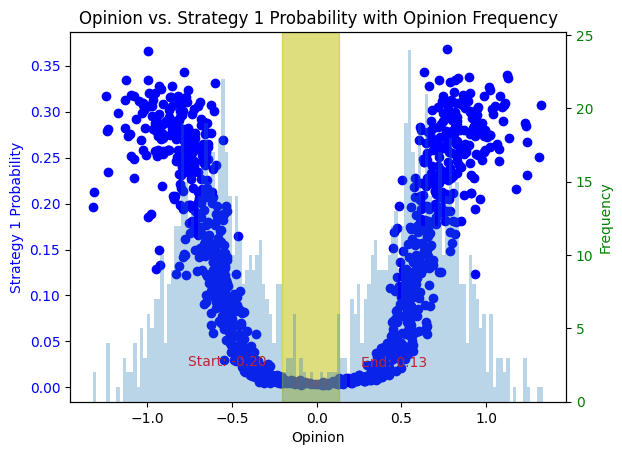

-0.3580198690337718 0.3695662305207907


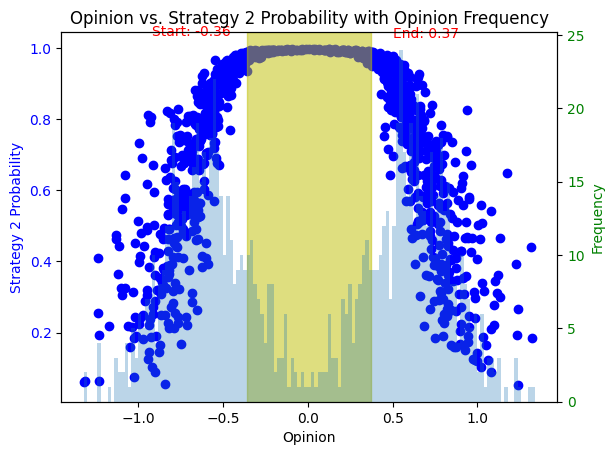

Sim with 200 iterations
-0.5189576317716383 0.5320505936879606


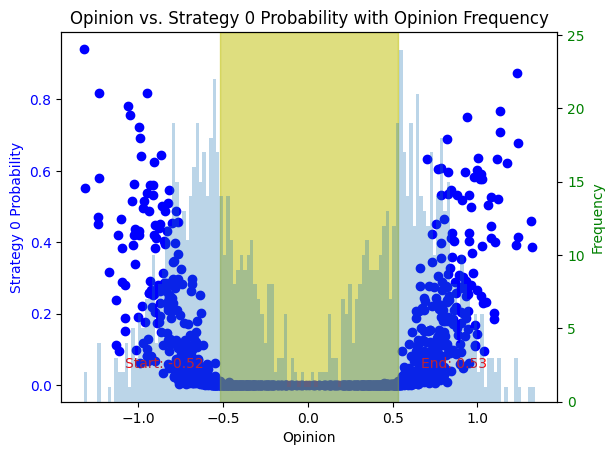

-0.4620431741702347 0.4471270669959073


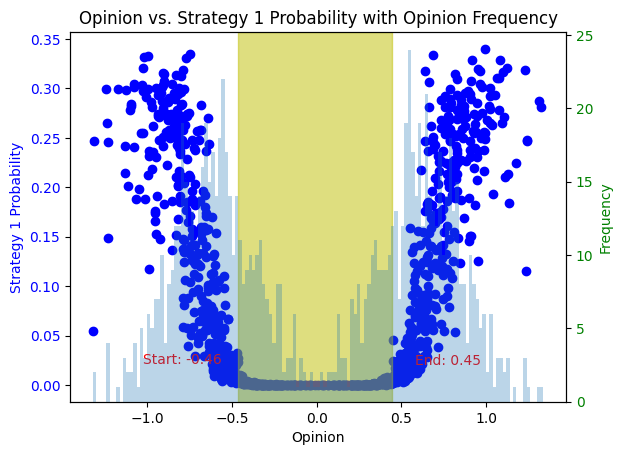

-0.5189576317716383 0.5320505936879606


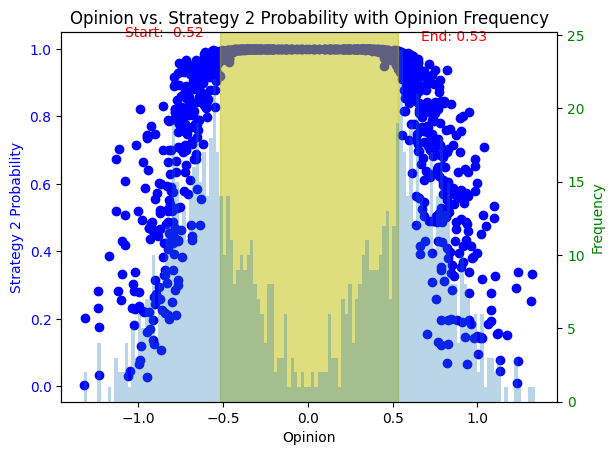

Sim with 300 iterations
-0.5872745089013818 0.5891673031456498


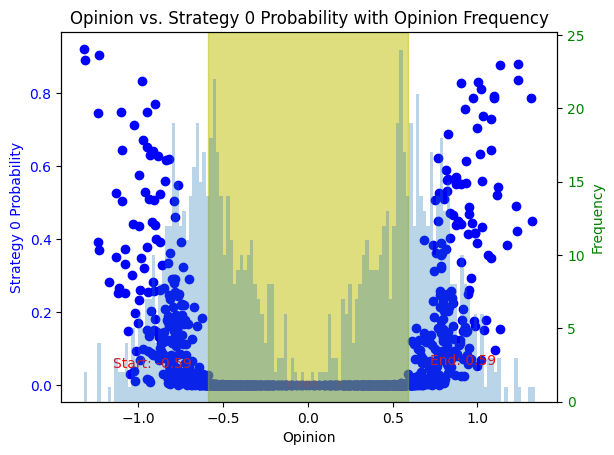

-0.5013621242385582 0.5078538819492793


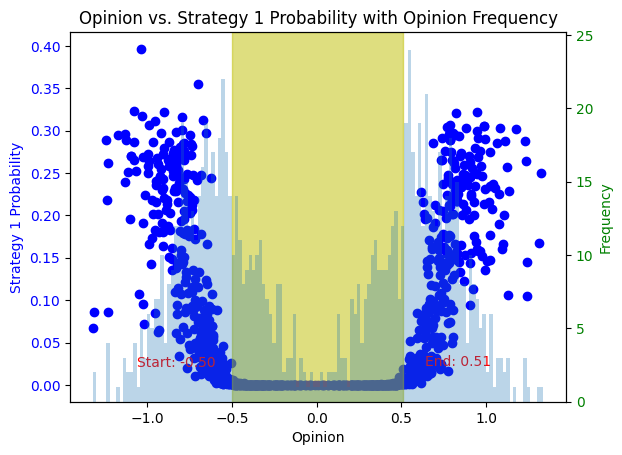

-0.5872745089013818 0.5517281684364467


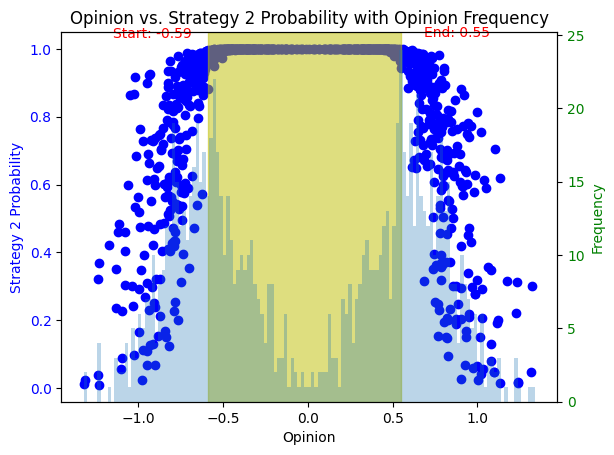

Sim with 400 iterations
-0.6154910054601342 0.6090801179188877


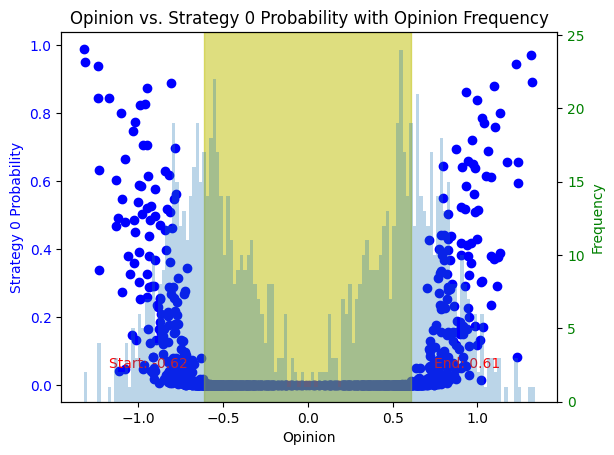

-0.5264196920422846 0.5543552599017354


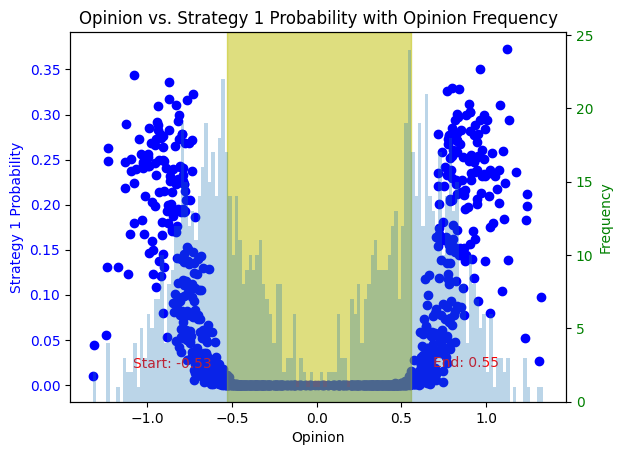

-0.6003638217464481 0.6090801179188877


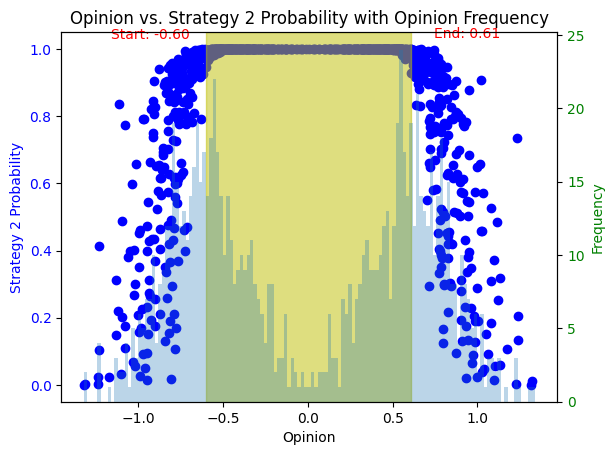

Sim with 500 iterations
-0.6529491141224333 0.634619254704529


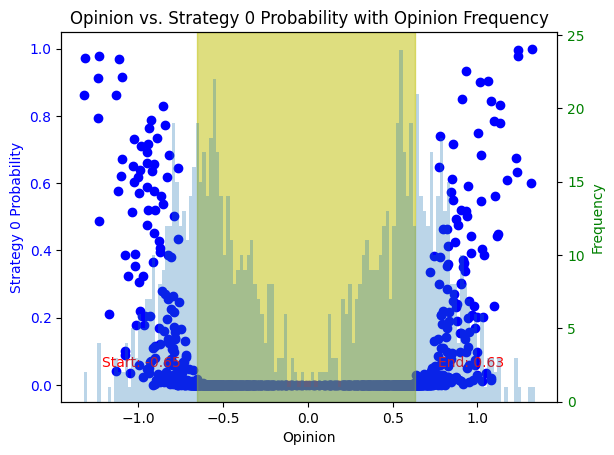

-0.5528900964494253 0.5772892492052035


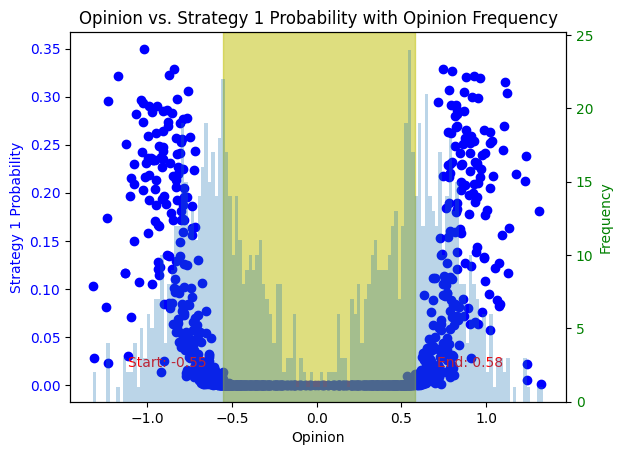

-0.6178005995852675 0.634619254704529


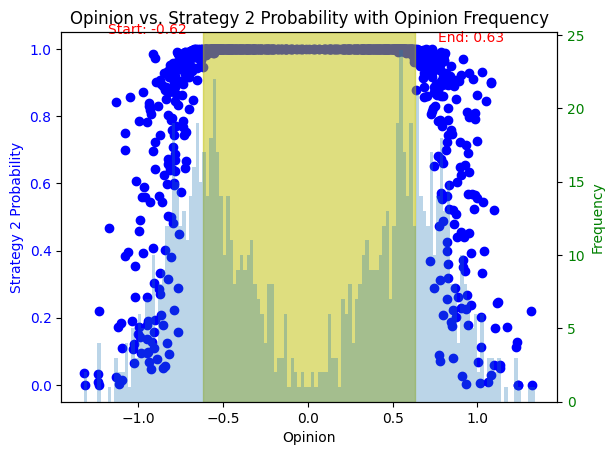

Sim with 600 iterations
-0.6401509202147792 0.6501672236937953


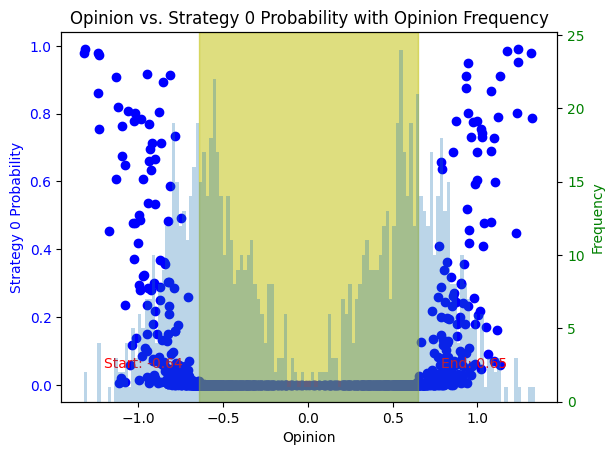

-0.6137287492244471 0.5953057908331055


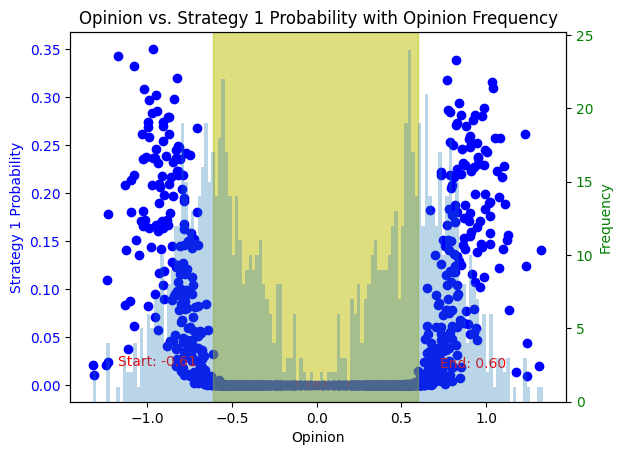

-0.6401509202147792 0.6384312065505878


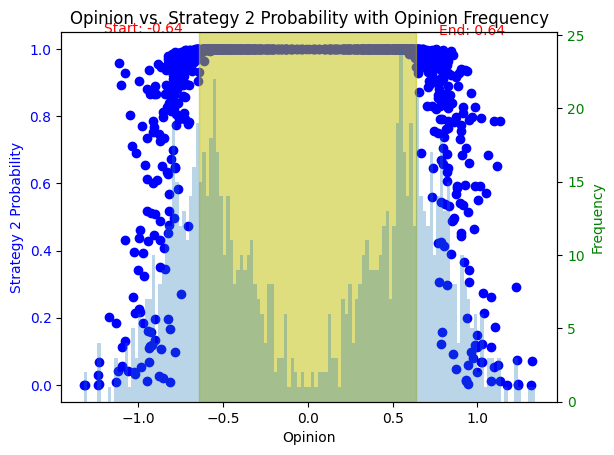

Sim with 700 iterations
-0.6801027672721638 0.7149210775711278


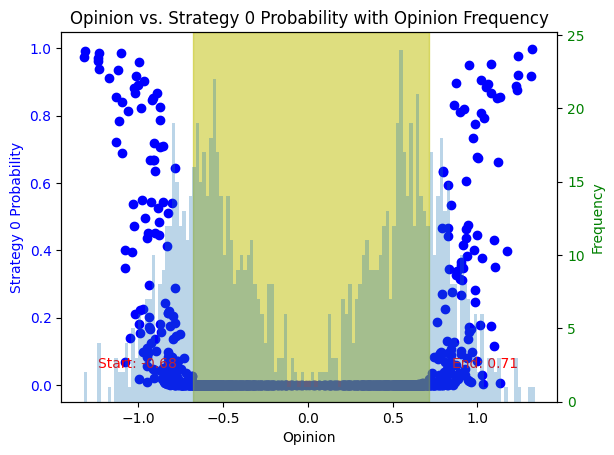

-0.6503348718638691 0.651058830389556


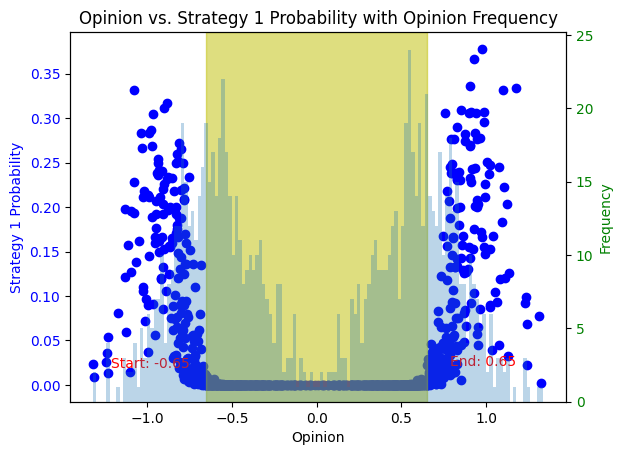

-0.6801027672721638 0.6728758095973455


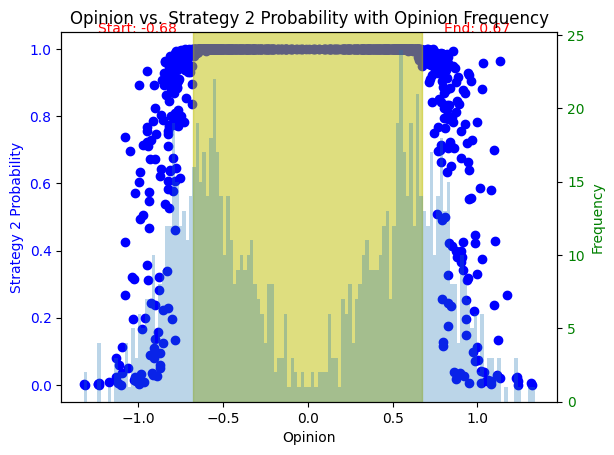

Sim with 800 iterations
-0.6963853318776642 0.6821461564291984


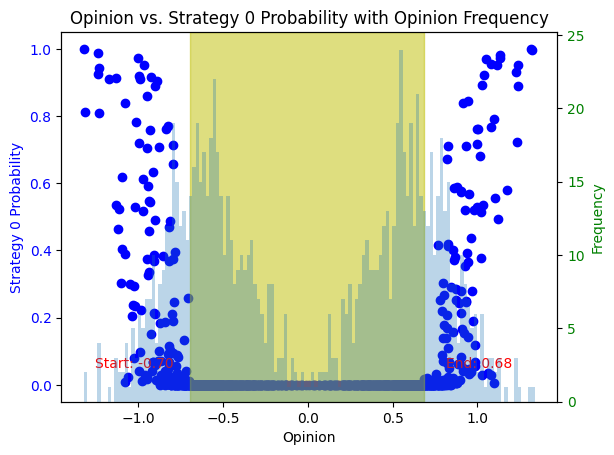

-0.6638040216555863 0.6581840259368583


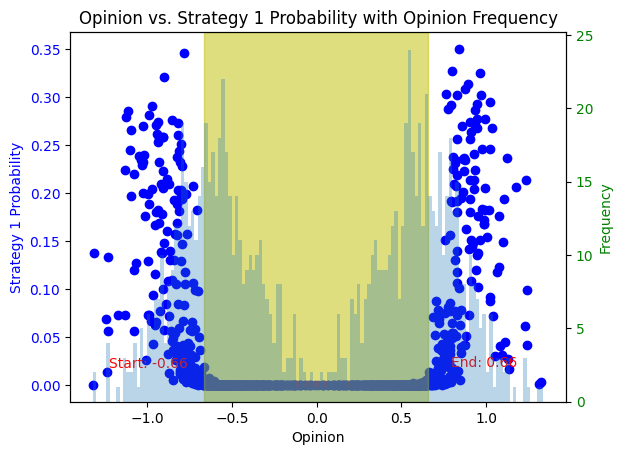

-0.6889497831983267 0.6821461564291984


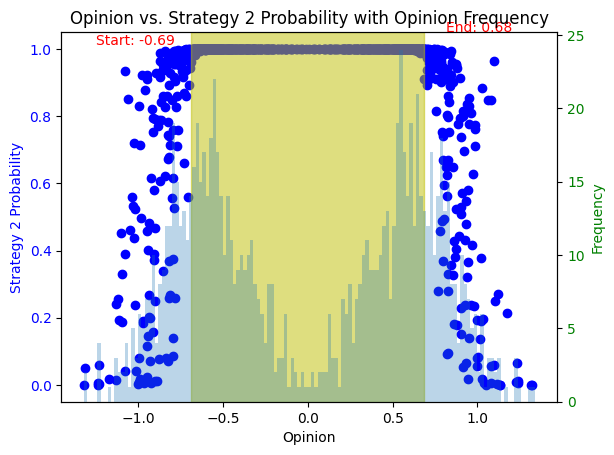

Sim with 900 iterations
-0.7322785756223151 0.716324773492494


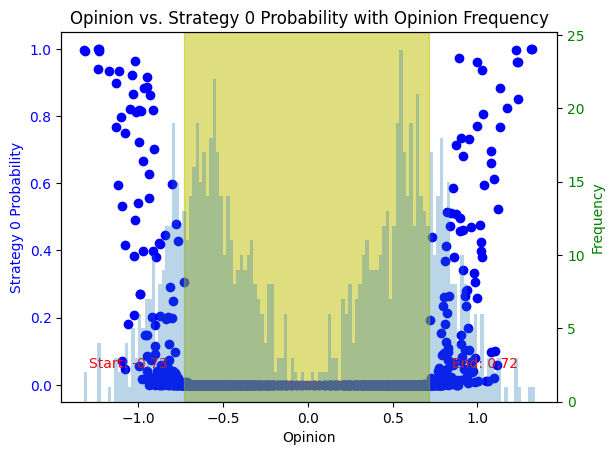

-0.649264707455909 0.6578569943829294


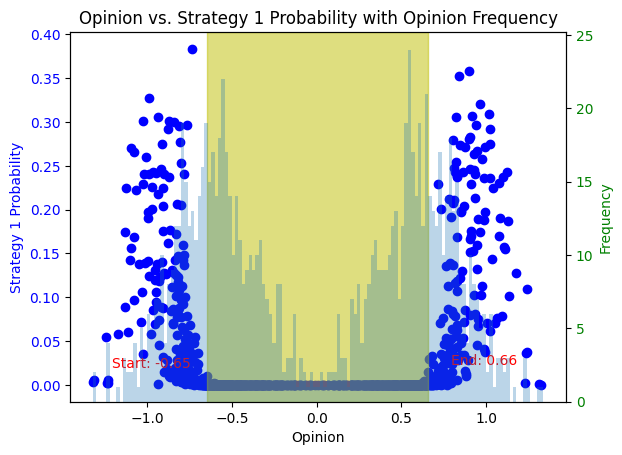

-0.7056677104121154 0.716324773492494


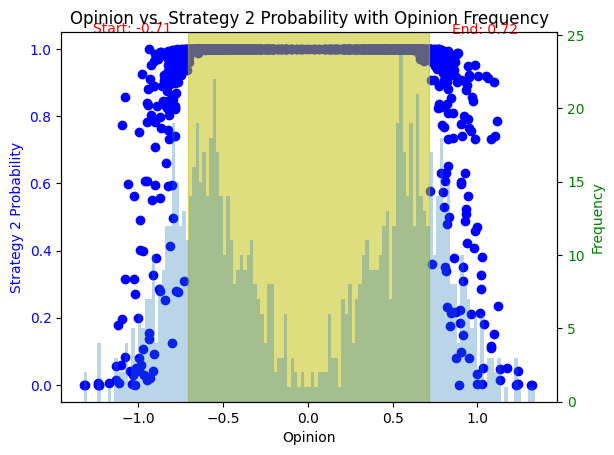

Sim with 1000 iterations
-0.7447248032593923 0.7454981547245031


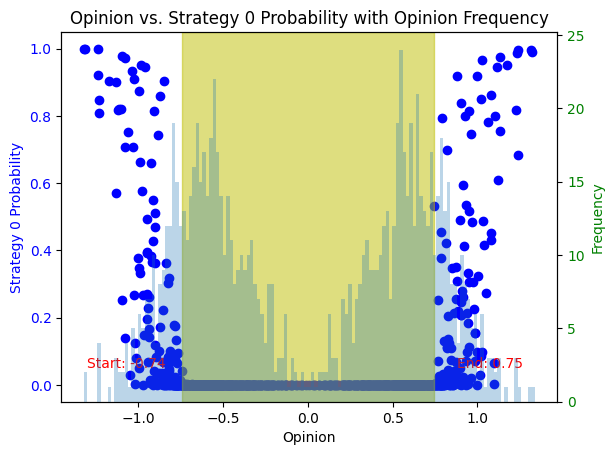

-0.6815300375377027 0.7056677104121154


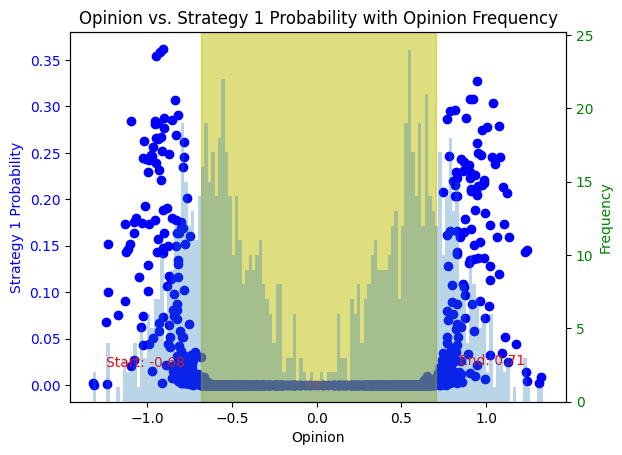

-0.7447248032593923 0.7454981547245031


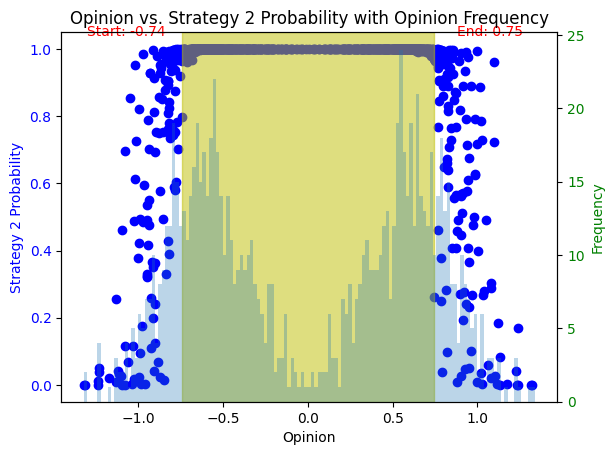

In [13]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }
    
for iterations, agents in sim_agents_list:
    print(f"=================================")
    print(f"Sim with {iterations} iterations")
    print(f"=================================")
    for agent in agents.values():
        agent.update_agent_strat_prob_history()

    # Sort agents by their opinions
    sorted_agents = sort_agents_by_opinion(agents)
    round_numbers = list(range(len(next(iter(agents.values())).old_strategy_weights)))  # Assuming all have the same round count

    # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
    for strat, threshold in strat_to_threshold.items():  # For each strategy
        opinions = []
        strat_prob = []

        # Collect data for each agent
        for uuid, agent in sorted_agents:
            opinions.append(agent.opinions[0])
            strat_prob.append(agent.agent_strat_prob_history[-1][strat])

        # Create a plot with two y-axes
        fig, ax1 = plt.subplots()

        # Scatter plot on primary y-axis
        ax1.scatter(opinions, strat_prob, color='b')
        # Get range for which everyone is above the threshold
        is_above_threshold = strat_to_threshold[strat] > 0.5
        threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
        if threshold_range:
            start_opinion = opinions[threshold_range[0]]
            end_opinion = opinions[threshold_range[1]]
            print(f"Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
            y_coord = -40 if is_above_threshold == True else -40
            ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
            ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
                xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
            ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
                xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')


        # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

        ax1.set_xlabel('Opinion')
        ax1.set_ylabel(f'Strategy {strat} Probability', color='b')
        
        # Create secondary y-axis for the histogram
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
        ax2.set_ylabel('Frequency', color='g')

        # Change the tick color and label color to match the plots
        ax1.tick_params(axis='y', labelcolor='b')
        ax2.tick_params(axis='y', labelcolor='g')

        plt.title(f'Opinion vs. Strategy {strat} Probability with Opinion Frequency')
        plt.show()


### What we want to see: 
    1. We should be able to graph an agents strategy over time
    2. See how an agents strategy over time compares to their opinion.

### Things to play around with:
    1. The Learning Rate
    2. Distribution of agents opinions
        - Distribution of agent strategies (all in low tolerance? all in high tolerance?)
        - Start weights of doing high or low to be different. 
    3. Number of iterations
    4. Add in a network - What type of network is a good questions
    5. Changing opinions... 
    6. Q learning
    7. Add more opinions
    8. Compare loss of people in stable range and people outside the stable range.
        - Compare the loss between agents



We need a plot that does loss of agent by strategy

Change the Initial Conditions 

In the paper we need to describe what we need to do
<!-- -0.5755451960754527 0.5723270454092269 -->


